# INTRODUCTION

# EXPLORATORY DATA ANALYSIS

## Business understanding of the problem

## Loading & First exploration

### Preliminary loading 

In [2]:
#Loading the necessary packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
#Loading the datasets
df_airport = pd.read_csv("Raw_data/training_set_airport_data.csv")
df_geographic = pd.read_csv("Prepared_data/new_geographic_data.csv", sep = ";")
df_weather = pd.read_csv("Raw_data/Weather_data/weather_data_train_set.csv")
df_aircraft = pd.read_csv("Prepared_data/ACchar.csv", sep = ";")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA of the training set airport data

In [6]:
df_airport.head()

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,1/1/2015 6:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,1/1/2015 6:10,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,1/1/2015 6:15,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,1/1/2015 6:20,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,1/1/2015 6:20,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2


In [4]:
#Rename the columns
df_airport.rename(columns={'Flight Datetime':'flight_dt',
                          'Aircraft Model':'aircraft_model'}, 
                 inplace=True)

In [8]:
df_airport.describe()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway
count,543813,543813,543813,543813,543813,543813
unique,244764,143,461674,538720,166,4
top,5/2/2015 6:10,A319,4/24/2018 18:35,8/15/2015 6:36,STAND_61,RUNWAY_2
freq,9,178048,5,3,3453,136375


In [5]:
#Convert date string into date format
df_airport['flight_dt'] =  pd.to_datetime(df_airport['flight_dt'], format='%m/%d/%Y %H:%M')
df_airport['AOBT'] =  pd.to_datetime(df_airport['AOBT'], format='%m/%d/%Y %H:%M')
df_airport['ATOT'] =  pd.to_datetime(df_airport['ATOT'], format='%m/%d/%Y %H:%M')
df_airport.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2


In [6]:
# Create a function that computes the TaxiTime in minutes
def DatetimeToTaxitime(datetime1, datetime2):
    difference = datetime2 - datetime1
    taxitime = difference.value / 6e10
    return taxitime

# Compute the taxitime in the airport dataframe 
df_airport['taxitime'] = df_airport.apply(lambda x: DatetimeToTaxitime(x.AOBT, x.ATOT), axis =1)

In [11]:
df_airport.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway,taxitime
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,9.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,10.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,11.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,12.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,13.0


In [12]:
df_airport.describe()

,taxitime
count,543813.000000
mean,18.754785
std,8.172083
min,-218.000000
25%,14.000000
50%,18.000000
75%,22.000000
max,656.000000


In [13]:
#NA search: No NA to clean
df_airport.isnull().sum()

flight_dt         0
aircraft_model    0
AOBT              0
ATOT              0
Stand             0
Runway            0
taxitime          0
dtype: int64

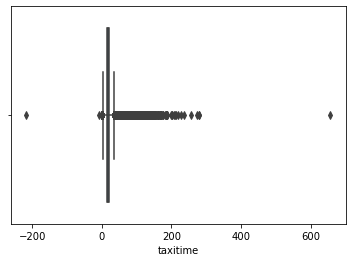

In [14]:
#Outliers search - there seems to some outliers 
# For some outiliers the ATOT is before the AOBT: there is a mistake so we should delete them
# For the others, we will see a strategy to handle the outliers in the data preparation section
ax = sns.boxplot(df_airport["taxitime"])

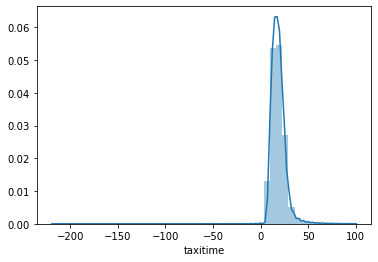

In [15]:
#We observe a quasi normal distribution
sns.distplot(df_airport[df_airport["taxitime"] <100].taxitime)

In [7]:
df_airport1 = df_airport[df_airport['Runway'] == 'RUNWAY_1']
df_airport2 = df_airport[df_airport['Runway'] == 'RUNWAY_2']
df_airport3 = df_airport[df_airport['Runway'] == 'RUNWAY_3']
df_airport4 = df_airport[df_airport['Runway'] == 'RUNWAY_4']

### EDA of the geographic dataset

In [17]:
df_geographic.head()

,runway_stand,Lat_runway,Lng_runway,Lat_stand,Lng_stand
0,RUNWAY_1STAND_1,54.755307,-0.02304,54.764575,0.000356
1,RUNWAY_1STAND_10,54.755307,-0.02304,54.764382,-0.001061
2,RUNWAY_1STAND_100,54.755307,-0.02304,54.766471,0.018516
3,RUNWAY_1STAND_101,54.755307,-0.02304,54.770003,0.020513
4,RUNWAY_1STAND_102,54.755307,-0.02304,54.769606,0.018924


In [8]:
# Create the functions that compute distance between runways & stands in kilometers
def degreesToRadians(degrees):
    return degrees * np.pi / 180

def distanceInMBetweenCoordinates(lat1, lon1, lat2, lon2):
    earthRadiusKm = 6371;

    dLat = degreesToRadians(lat2-lat1)
    dLon = degreesToRadians(lon2-lon1)

    lat1 = degreesToRadians(lat1)
    lat2 = degreesToRadians(lat2)

    calculation = np.sin(dLat/2) * np.sin(dLat/2) + np.sin(dLon/2) * np.sin(dLon/2) * np.cos(lat1) * np.cos(lat2) 
    distance = 2 * math.atan2(np.sqrt(calculation), np.sqrt(1-calculation)) 
    return earthRadiusKm * distance * 1000

In [9]:
# Compute the distance in the aircraft dataframe
df_geographic['distance'] = df_geographic.apply(lambda x: distanceInMBetweenCoordinates(x.Lat_runway, x.Lng_runway, x.Lat_stand, x.Lng_stand), axis =1)

In [20]:
df_geographic.describe()

,Lat_runway,Lng_runway,Lat_stand,Lng_stand,distance
count,664.000000,664.000000,664.000000,664.000000,664.000000
mean,54.758773,-0.004747,54.767037,0.009493,1730.470344
std,0.002643,0.019280,0.003191,0.009616,897.514890
min,54.755307,-0.024107,54.761081,-0.009674,158.869217
25%,54.756667,-0.023307,54.764575,0.003887,992.633820
50%,54.759147,-0.007360,54.766618,0.009772,1461.000769
75%,54.761253,0.011200,54.769606,0.018498,2578.251494
max,54.761493,0.019840,54.773947,0.026379,3321.122245


In [21]:
#NA search: No NA to clean
df_geographic.isnull().sum()

runway_stand    0
Lat_runway      0
Lng_runway      0
Lat_stand       0
Lng_stand       0
distance        0
dtype: int64

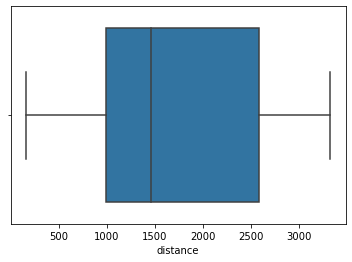

In [22]:
#Outliers search - there seems to be no outlier 
ax = sns.boxplot(df_geographic["distance"])

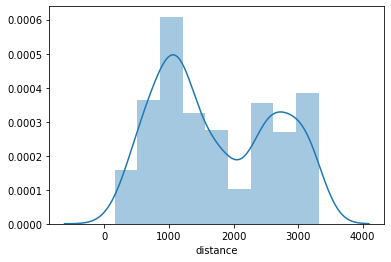

In [23]:
sns.distplot(df_geographic["distance"])

In [24]:
df_geographic = df_geographic[['runway_stand', 'distance']]

### EDA of the weather dataset

In [25]:
df_weather.head()

,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


In [10]:
#Convert date string into date format
df_weather['time_hourly'] =  pd.to_datetime(df_weather['time_hourly'], format='%m/%d/%Y %H:%M')

In [11]:
#Rename the columns
df_weather.rename(columns={'time_hourly':'AOBT_hourly'}, 
                 inplace=True)

#Create hourly AOBT in airport data to join with weather data

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

# Compute the distance in the aircraft dataframe
df_airport['AOBT_hourly'] = df_airport.apply(lambda x: hour_rounder(x.AOBT), axis =1)

In [12]:
df_weather = df_weather.drop_duplicates()

In [ ]:
df_weather.describe()

### EDA of the aircraft dataset

In [ ]:
df_aircraft.head()

In [ ]:
len(df_aircraft)

## Data analysis

### Combining all datasets

In [13]:
#Let's combine our training set with the aircraft dataset (the key is the model)
df_train = pd.merge(df_airport, df_aircraft ,on='aircraft_model',how='left')

#Let's combine our training set with the geographic dataset (the key is the runway & the stand)
df_train['runway_stand'] = df_train['Runway'] + df_train['Stand']
df_train = pd.merge(df_train, df_geographic ,on='runway_stand',how='left')

#Let's combine our training set with the weather dataset (the key is the datetime)
df_train = pd.merge(df_train, df_weather ,on = 'AOBT_hourly', how='left')

### Correlation analysis

In [ ]:
df_train.head()

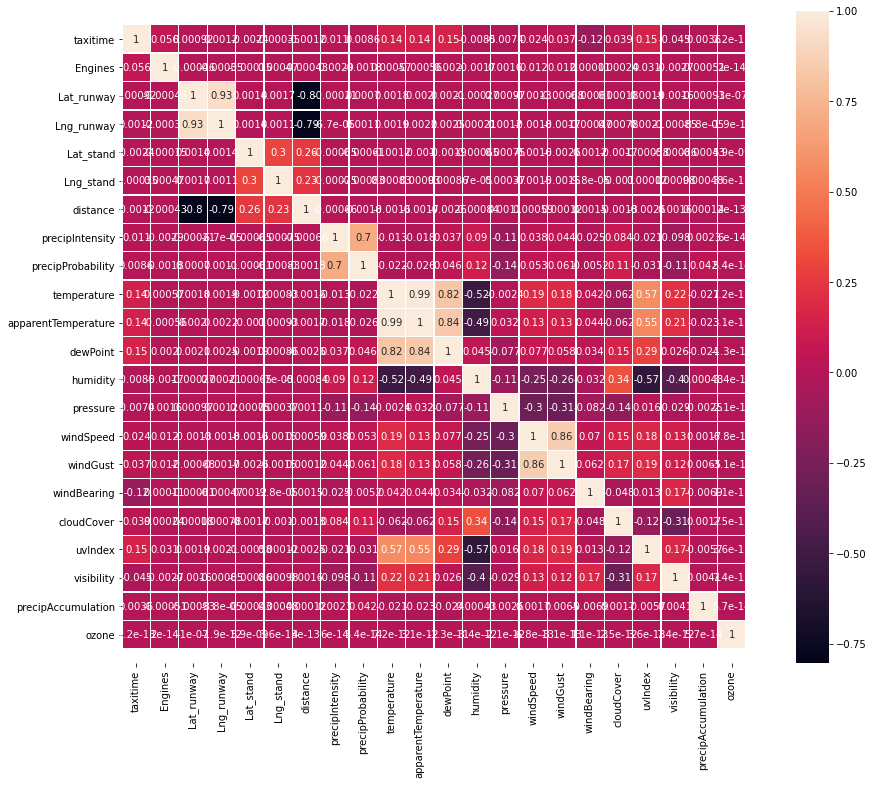

In [13]:
#Display the correlation matrix between the variables 
base_correlation = df_train.drop(['flight_dt', 'AOBT', 'ATOT', 'AOBT_hourly'], axis=1)
corrMatrix = base_correlation.corr()
plt.figure(figsize = (18,12))
sns.heatmap(corrMatrix, annot=True, square=True, linewidths=.3)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [ ]:
base_pairplot = df_train[['taxitime', 'distance', 'pressure', 'windSpeed', 'precipAccumulation', 'temperature']]
plt.figure(figsize=(14, 14))

sns.pairplot(base_pairplot, diag_kind='kde')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


### Time series analysis

In [14]:
# Set date as index
df_ts = df_train.set_index('AOBT')
df_ts = df_ts.drop(['flight_dt', 'ATOT', 'AOBT_hourly'], axis=1)

In [ ]:
#The models ARIMA etc won't work on this data where no pattern can be found
plt.figure(figsize=(20,12)) #set the figure size

plt.subplot(2, 1, 1)
values_1 = df_ts[['taxitime']].values
plt.plot(values_1[300:700], color = 'red')    
plt.title('taxitime', y=0.5, loc='left')

plt.subplot(2, 1, 2)
values_2 = df_ts[['taxitime']].values
plt.plot(values_2[5000:5300])    
plt.title('taxitime', y=0.5, loc='left')

plt.show()

# DATA PREPARATION

## Data cleaning

### Missing values cleaning

In [ ]:
df_train.isnull().sum()

In [15]:
#We can drop the missing values for all the column where they correspond to delete (because less than 1% of the huge dataset)
subset_delete = ['Manufacturer', 'Engines', 'Wingspan__ft', 'Length__ft', 'Tail_Height__ft', 
                'Wheelbase__ft', 'Wake_Category', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
                'windSpeed', 'visibility', 'precipType', 'precipAccumulation', 'ozone']
df_train = df_train.dropna(subset = subset_delete)

In [16]:
#For the remaining NAs value (weather data), 
#we are going to use the method fillna assuming that the weather does not change as much from one hour to another
df_train = df_train.fillna(method='ffill')

### Deal with the outliers of taxitime

In [17]:
#From the EDA and the Outliers search for the variable to predict - there seems to be some outliers 
# For some outliers the ATOT is before the AOBT: there is a mistake so we should delete them

#Delete the taxitime < 0 (we assume that there is a mistake)
df_train = df_train[df_train["taxitime"] > 0]



In [18]:
# For the others, we will use Z-score strategy to identify Data point that falls outside of 3 standard deviations 
z_score = np.abs(stats.zscore(df_train.taxitime))
threshold = 3
print(len(np.where(z_score > 3)[0]))

df_train = df_train[(z_score< 3)]

7171


In [ ]:
df_train

## Features engineering

### Computing log(distance)

In [19]:
df_train['log_distance'] = np.log(df_train['distance'])

In [ ]:
df_train.head()

### Computing Q and N

In [ ]:
## ATTEMPT USING PARALLELIZATION OF COMPUTATION
import time

#Checking if a date is in the interval [date1,date2]
def CheckDateInInterval(date,date1,date2):
    if date >= date1 and date2 >= date:
        return 1
    else:
        return 0

#Initializing N & Q list
Q_list = []
N_list = []

#Creating one list of all AOBTs and one list of all ATOTs
interval_list1 = list(df_airport['AOBT'])
interval_list2 = list(df_airport['ATOT'])

start_time = time.time()

#We take as a window the number of Stands in the airport (166)
# Here we assume at most, there is as much airplanes in taxitime at the same time than the number of stands 
window = len(df_airport['Stand'].unique())

for row in range(len(df_airport)):
    #Setting the AOBT and ATOT of a given row
    AOBT = interval_list1[row]
    ATOT = interval_list2[row]
    
    #Defining the min and max rows in the dataframe this iteration will have to consider
    min_row = max(0, row - window)
    max_row = min(row + window, len(df_airport))
    
    short_list1 = interval_list1[min_row : max_row]
    short_list2 = interval_list2[min_row : max_row]
    
    #Creating a list of Booleans where there is 1 if for this iteration the row meets the condition for N
    N_boolean = map(lambda x, y : CheckDateInInterval(AOBT, x, y), short_list1, short_list2)
    #Computing the sum of the airplane satisfying the condition for N
    N_number = max(sum(list(N_boolean))-1, 0)
    N_list.append(N_number)

    #Creating a list of Booleans where there is 1 if for this iteration the row meets the condition for Q
    Q_boolean = map(lambda y : CheckDateInInterval(y, AOBT, ATOT), short_list2)
    #Computing the sum of the airplane satisfying the condition for Q
    Q_number = max(0, sum(list(Q_boolean))-1)
    Q_list.append(Q_number)
    
    if row % 50000 == 0:
        running_time = time.time() - start_time
        print("Row number: ", row, "/ Running time: " , running_time)

df_airport['N'] = N_list        
df_airport['Q'] = Q_list

Row number:  0 / Running time:  0.029689311981201172


In [ ]:
df_airport.describe()

### Converting Date data

In [ ]:
df_train.head()

In [ ]:
pi = np.pi


def date_transfo(df):
#Transform Date into several column
    df['weekday'] = df['AOBT'].dt.weekday
    df['hour'] = df['AOBT'].dt.hour
    df['weeknum'] = df['AOBT'].dt.week
    df['night'] = (df['hour'] < 6) + (df['hour'] > 22)*1
    df['morning'] = (df['hour'] > 6) * (df['hour'] < 12)*1
    df['midday'] = (df['hour'] > 12) * (df['hour'] < 14)*1
    df['afternoon'] = (df['hour'] > 14) * (df['hour'] < 18)*1
    df['evening'] = (df['hour'] > 18) * (df['hour'] < 22)*1
    df['weekend'] = (df['weekday'] > 4)*1
    
    # Get circular hour
    df['hour_sin'] = np.sin(pi* df['hour'].astype(np.float64) /12)
    df['hour_cos'] = np.cos(pi* df['hour'].astype(np.float64) /12)
    df['week_sin'] = np.sin(pi* df['weeknum'].astype(np.float64) /26)
    df['week_cos'] = np.cos(pi* df['weeknum'].astype(np.float64) /26)

    return(df)

df_train = date_transfo(df_train)

## Split into train and test sets

In [ ]:
#Split the dataset into X & y (where y is the variable to predict)
df_y = df_train['taxitime']
df_X = df_train.drop(['taxitime'], axis=1)

In [ ]:
df_X.head()

In [ ]:
#Delete useless columns
df_X.set_index('AOBT')
df_X = df_X.drop(['flight_dt', 'aircraft_model', 'ATOT', 'AOBT_hourly', 'Manufacturer'], axis = 1)

In [ ]:
# Split test & train randomly
X_train, X_test, y_train, y_test = train_test_split(
     df_X, df_y, test_size=0.2, random_state=42)

In [ ]:
df_X.to_csv('clean_training_set.csv.zip', index=False,
          compression='gzip')

## Features importance & selection

## Training dataset master creation